# Problem statement



Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Read the data

In [2]:
df1=pd.read_csv('test.csv')
df2=pd.read_csv('train.csv')
submission=pd.read_csv('sample_submission.csv')

In [3]:
submission # Given submission by kaggle

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [4]:
spaceship=df1.append(df2)
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
spaceship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [6]:
datatypes=spaceship.dtypes.value_counts()
datatypes

object     8
float64    6
dtype: int64

In [7]:
Null_Perc=round(spaceship.isna().sum()*100/len(spaceship),2)  
Null_Perc

PassengerId      0.00
HomePlanet       2.22
CryoSleep        2.39
Cabin            2.31
Destination      2.11
Age              2.08
VIP              2.28
RoomService      2.03
FoodCourt        2.23
ShoppingMall     2.36
Spa              2.19
VRDeck           2.07
Name             2.27
Transported     32.98
dtype: float64

In [8]:
# Dropping NA values
df=spaceship.dropna()

In [9]:
df.Transported.value_counts() 

True     3327
False    3279
Name: Transported, dtype: int64

In [10]:
df['Transported'].value_counts()*100/len(df),2

(True     50.363306
 False    49.636694
 Name: Transported, dtype: float64,
 2)

In [11]:
df.drop(['Name','Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [12]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


In [13]:
df["PassengerId"] = df.PassengerId.astype(int)

# Exploratory Data Analysis

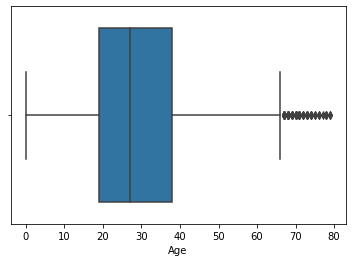

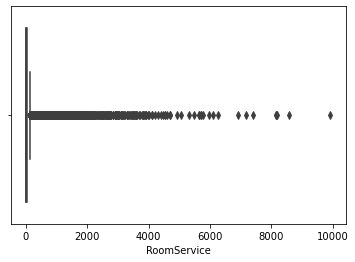

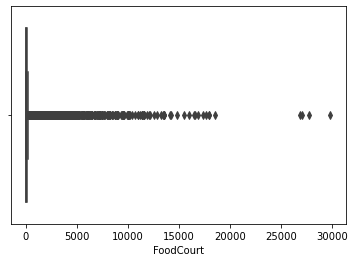

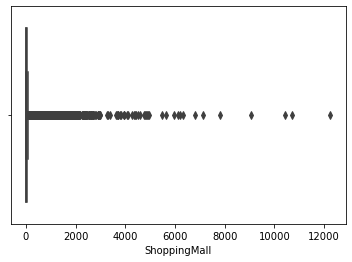

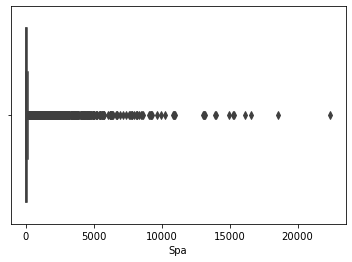

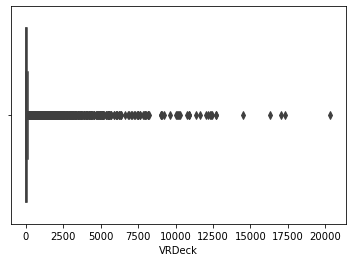

In [14]:
cols=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

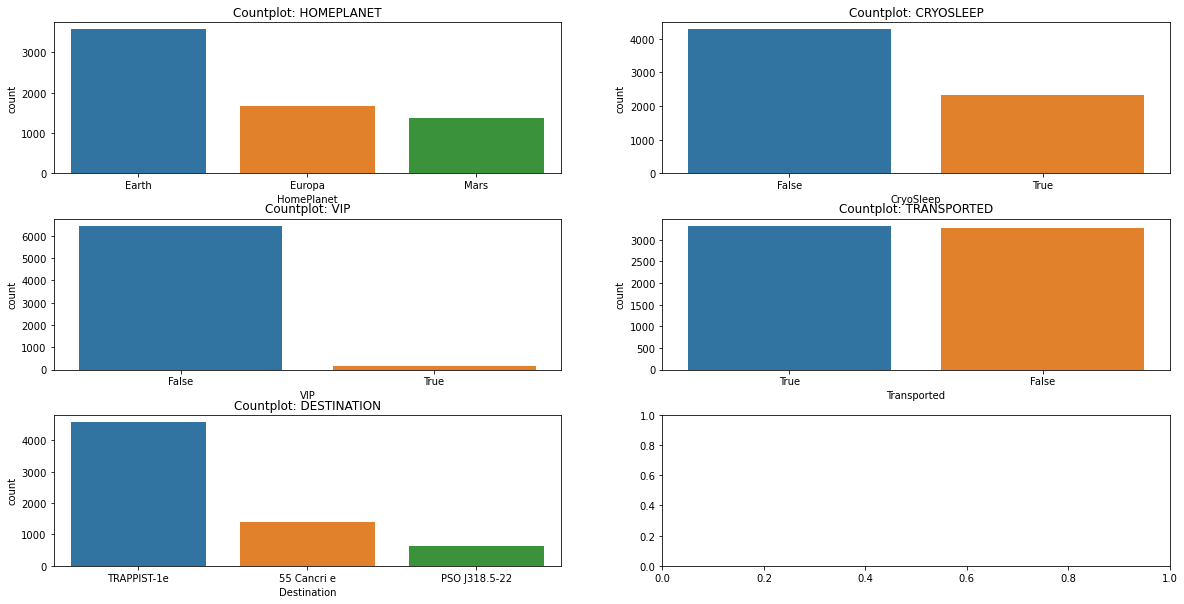

In [15]:
Numerical_count_plot = ['HomePlanet','CryoSleep','VIP','Transported','Destination']
fig,axes = plt.subplots(3,2,figsize=(20,10))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(Numerical_count_plot,axes.flatten()):
    sns.countplot(x=i,data = df, ax=j,order = list(df[i].value_counts().index))
    j.set_title('Countplot: ' +i.upper());

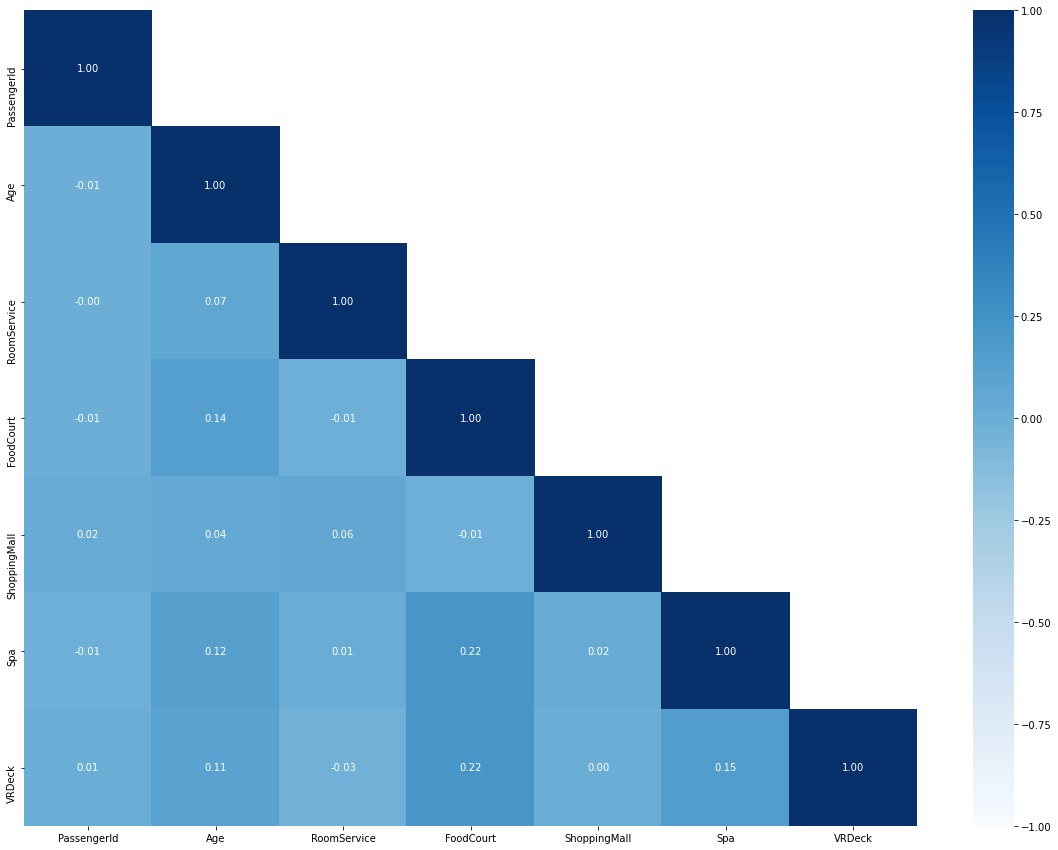

In [16]:
# Bivariate analysis
plt.figure(figsize=(20,15))
cor_matrix = df.corr()
sns.heatmap(cor_matrix, cmap = 'Blues', annot=True, fmt='.2f', vmin = -1, vmax= 1,mask=np.triu(cor_matrix,+1));

# Checking the count of outliers

In [17]:
df_ol = df.drop('Transported',axis=1)
Q1 = df_ol.quantile(0.25)
Q3 = df_ol.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [18]:
((df_ol > UL) | (df_ol < LL)).sum().sort_values(ascending = False)

RoomService     1431
ShoppingMall    1413
FoodCourt       1407
Spa             1389
VRDeck          1378
Age               62
VIP                0
PassengerId        0
HomePlanet         0
Destination        0
CryoSleep          0
dtype: int64

In [19]:
# column wise outliers percentage
((df_ol > UL) | (df_ol < LL)).sum().sort_values(ascending = False)/df_ol.index.size*100

RoomService     21.662125
ShoppingMall    21.389646
FoodCourt       21.298819
Spa             21.026340
VRDeck          20.859824
Age              0.938541
VIP              0.000000
PassengerId      0.000000
HomePlanet       0.000000
Destination      0.000000
CryoSleep        0.000000
dtype: float64

In [20]:
# Converting all objects to categorical codes
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: HomePlanet
['Europa', 'Earth', 'Mars']
Categories (3, object): ['Earth', 'Europa', 'Mars']
[1 0 2]


feature: CryoSleep
[False, True]
Categories (2, object): [False, True]
[0 1]


feature: Destination
['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
Categories (3, object): ['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e']
[2 1 0]


feature: VIP
[False, True]
Categories (2, object): [False, True]
[0 1]


feature: Transported
[False, True]
Categories (2, object): [False, True]
[0 1]


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   int32  
 1   HomePlanet    6606 non-null   int8   
 2   CryoSleep     6606 non-null   int8   
 3   Destination   6606 non-null   int8   
 4   Age           6606 non-null   float64
 5   VIP           6606 non-null   int8   
 6   RoomService   6606 non-null   float64
 7   FoodCourt     6606 non-null   float64
 8   ShoppingMall  6606 non-null   float64
 9   Spa           6606 non-null   float64
 10  VRDeck        6606 non-null   float64
 11  Transported   6606 non-null   int8   
dtypes: float64(6), int32(1), int8(5)
memory usage: 739.3 KB


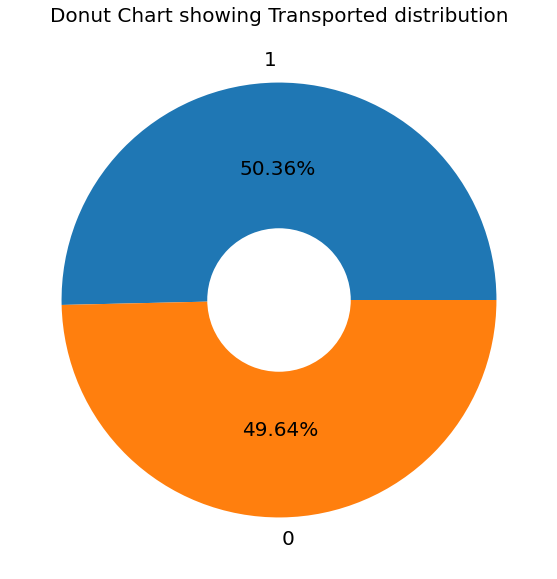

In [22]:
plt.figure(figsize=(10,10))
plt.pie(df.Transported.value_counts(1)*100,labels=df.Transported.value_counts().index,autopct='%1.2f%%', radius=1,textprops={'fontsize': 20})
plt.pie([1],colors=['w'],radius=0.33)
plt.title('Donut Chart showing Transported distribution',size=20)
plt.show()

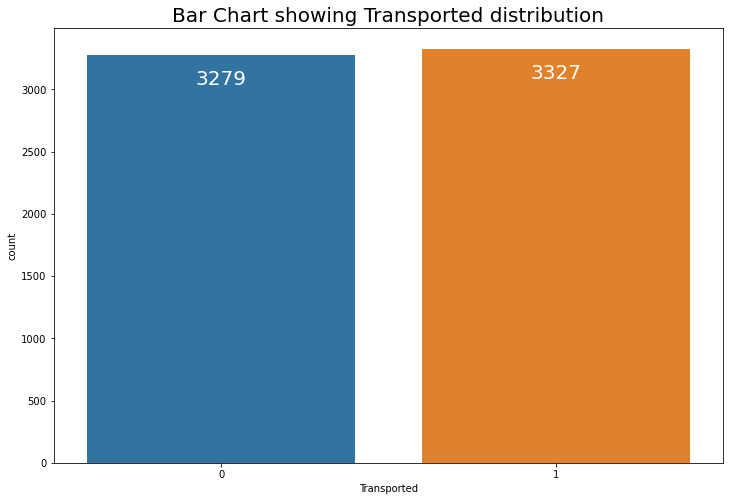

In [23]:
plt.figure(figsize=(12,8))
cplot = sns.countplot(df.Transported)
plt.title('Bar Chart showing Transported distribution',size=20)
for p in cplot.patches:
        cplot.annotate(format(int(p.get_height())),(p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', size=20, color='w' ,xytext = (0, -25),textcoords = 'offset points')
plt.show()

In [24]:
X =df.drop('Transported', axis=1)
y=df['Transported']

In [25]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,101,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,201,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,301,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,302,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,401,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,927601,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,927801,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,927901,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,928001,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [26]:
y.value_counts()

1    3327
0    3279
Name: Transported, dtype: int64

In [27]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
calc_vif(X).sort_values(by='VIF', ascending = True) # VIF is not more in any varaibles so we can retain the variables.

,variables,VIF
5,VIP,1.079691
8,ShoppingMall,1.176284
9,Spa,1.176359
10,VRDeck,1.182718
7,FoodCourt,1.240003
6,RoomService,1.293153
2,CryoSleep,1.810472
1,HomePlanet,1.974076
0,PassengerId,3.087816
3,Destination,3.103350


In [29]:
# Feature importance
f_1='Transported ~VIP+ShoppingMall+Spa+VRDeck+FoodCourt+RoomService+CryoSleep+HomePlanet+Destination+Age'

In [30]:
import statsmodels.formula.api as SM
model_1 = SM.logit(formula = f_1, data=df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.458154
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Transported   No. Observations:                 6606
Model:                          Logit   Df Residuals:                     6595
Method:                           MLE   Df Model:                           10
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                  0.3390
Time:                        15:08:01   Log-Likelihood:                -3026.6
converged:                       True   LL-Null:                       -4578.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3293      0.101      3.274      0.001       0.132       0.526
VIP             -0.2831      0.250     -1.132      0.258      -0.773       0.207
ShoppingMall     0.0005   7.08e-05      7.615      0.000       0.000       0.001
Spa             -0.0017      0.000    -14.448      0.000      -0.002      -0.001
VRDeck          -0.0016      0.000    -14.683      0.000      -0.002      -0.001
FoodCourt        0.0007   4.37e-05     16.660      0.000       0.001       0.001
RoomService     -0.0016      0.000    -15.151      0.000      -0.002      -0.001
CryoSleep        1.4618      0.080     18.185      0.000       1.304       1.619
HomePlanet       0.5190      0.044     11.710      0.000       0.432       0.606
Destination     -0.3541      0.041     -8.541      0.000      -0.435      -0.273
Age             -0.0047      0.002     -2.109      0.035      -0.009      -0.000
================================================================================
"""

In [31]:
coef_summary = pd.DataFrame(model_1.params,columns=['coef'])
impt = coef_summary.drop('Intercept').sort_values('coef',ascending = False)
impt

,coef
CryoSleep,1.461779
HomePlanet,0.519046
FoodCourt,0.000728
ShoppingMall,0.000539
VRDeck,-0.001581
RoomService,-0.001624
Spa,-0.001672
Age,-0.004676
VIP,-0.283069
Destination,-0.354146


# Model building and interpretation

In [32]:
# Extracting the target column into separate vectors for training set and test set
X =df.drop('Transported', axis=1)
y=df.pop('Transported')

In [33]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [34]:
# Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (4624, 11)
X_test (1982, 11)
train_labels (4624,)
test_labels (1982,)


In [35]:
X.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,101,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,201,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,301,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,302,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,401,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0


In [36]:
y.value_counts()

1    3327
0    3279
Name: Transported, dtype: int64

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'max_depth': [20,40,60],
    'max_features': [10,20],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [500,700,1000],
    
}
rfcl=RandomForestClassifier()
grid_search_RF=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=10)

In [39]:
grid_search_RF.fit(X_train,train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 40, 60], 'max_features': [10, 20],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [500, 700, 1000]})

In [40]:
grid_search_RF.best_params_

{'max_depth': 40,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 100,
 'n_estimators': 500}

In [41]:
best_grid_RF=grid_search_RF.best_estimator_

In [42]:
best_grid_RF

RandomForestClassifier(max_depth=40, max_features=10, min_samples_leaf=5,
                       min_samples_split=100, n_estimators=500)

In [43]:
ytrain_predict_RF = best_grid_RF.predict(X_train)
ytest_predict_RF = best_grid_RF.predict(X_test)

# RF Model Performance Evaluation on Training data

In [44]:
rf_train_acc=best_grid_RF.score(X_train,train_labels)
rf_train_acc

0.8243944636678201

In [45]:
print(classification_report(train_labels,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2302
           1       0.81      0.85      0.83      2322

    accuracy                           0.82      4624
   macro avg       0.82      0.82      0.82      4624
weighted avg       0.82      0.82      0.82      4624



Area under Curve is 0.9138125406436077


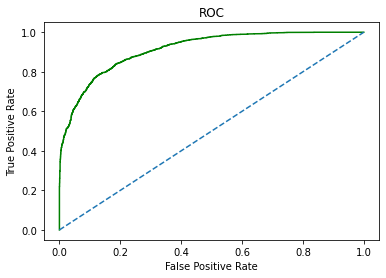

In [46]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_RF.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_RF.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [47]:
confusion_matrix(train_labels,ytrain_predict_RF)

array([[1849,  453],
       [ 359, 1963]], dtype=int64)

In [48]:
# 3 values
rf_metrics=classification_report(train_labels, ytrain_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.81
rf_train_recall  0.85
rf_train_f1  0.83


# RF Model Performance Evaluation on Test data

In [49]:
rf_test_acc=best_grid_RF.score(X_test,test_labels)
rf_test_acc

0.7896064581231079

In [50]:
print(classification_report(test_labels,ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       977
           1       0.78      0.82      0.80      1005

    accuracy                           0.79      1982
   macro avg       0.79      0.79      0.79      1982
weighted avg       0.79      0.79      0.79      1982



Area under Curve is 0.88260539676235


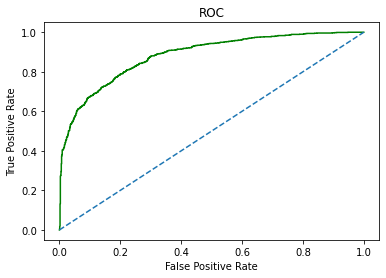

In [51]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_RF.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_RF.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [52]:
confusion_matrix(test_labels,ytest_predict_RF)

array([[739, 238],
       [179, 826]], dtype=int64)

In [53]:
print (pd.DataFrame(best_grid_RF.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
CryoSleep     0.413046
Spa           0.096323
FoodCourt     0.095170
VRDeck        0.079207
HomePlanet    0.074603
RoomService   0.064706
Age           0.061599
ShoppingMall  0.054391
PassengerId   0.051766
Destination   0.008955
VIP           0.000235


In [54]:
# 3 values
rf_metrics=classification_report(test_labels, ytest_predict_RF,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.78
rf_test_recall  0.82
rf_test_f1  0.8


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(solver='newton-cg',max_iter=30000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.9s finished


LogisticRegression(max_iter=30000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [57]:
Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

In [58]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.576818,0.423182
1,0.381580,0.618420
2,0.298271,0.701729
3,0.317988,0.682012
4,0.980684,0.019316


# LR model Performance Evaluation on Train data

In [59]:
lr_train_acc=model.score(X_train,train_labels)
lr_train_acc

0.78719723183391

AUC: 0.870


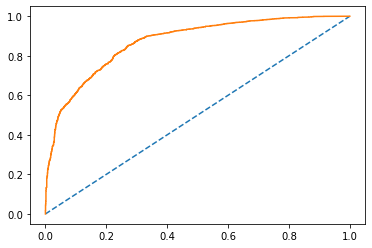

In [60]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
lr_train_auc = roc_auc_score(train_labels, probs)
lr_train_fpr, lr_train_tpr, train_thresholds = roc_curve(train_labels, probs)
print('AUC: %.3f' % lr_train_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr)

In [61]:
optimal_idx = np.argmax(lr_train_tpr - lr_train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.44865274048750137

In [62]:
y_train_pred=[]
for i in range(0,len(probs)):
    if np.array(probs)[i]>0.25:
        a=1
    else:
        a=0
    y_train_pred.append(a)

In [63]:
confusion_matrix(train_labels, y_train_pred)

array([[1267, 1035],
       [ 162, 2160]], dtype=int64)

In [64]:
print(classification_report(train_labels, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68      2302
           1       0.68      0.93      0.78      2322

    accuracy                           0.74      4624
   macro avg       0.78      0.74      0.73      4624
weighted avg       0.78      0.74      0.73      4624



In [65]:
lr_metrics=classification_report(train_labels, y_train_pred,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.68
lr_train_recall  0.93
lr_train_f1  0.78


# LR model Performance Evaluation on Test data

In [66]:
lr_test_acc=model.score(X_test, test_labels)
lr_test_acc

0.7906155398587286

AUC: 0.871


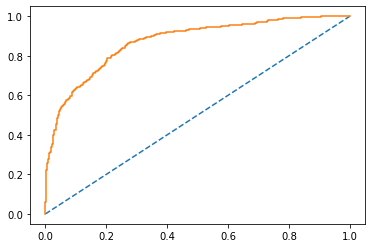

In [67]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
lr_test_auc = roc_auc_score(test_labels, probs)
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(test_labels, probs)
print('AUC: %.3f' % lr_test_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr)

In [68]:
y_test_pred=[]
for i in range(0,len(probs)):
    if np.array(probs)[i]>0.25:
        a=1
    else:
        a=0
    y_test_pred.append(a)

In [69]:
confusion_matrix(test_labels, y_test_pred)

array([[513, 464],
       [ 67, 938]], dtype=int64)

In [70]:
print(classification_report(test_labels, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66       977
           1       0.67      0.93      0.78      1005

    accuracy                           0.73      1982
   macro avg       0.78      0.73      0.72      1982
weighted avg       0.78      0.73      0.72      1982



In [71]:
print(classification_report(test_labels, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.53      0.66       977
           1       0.67      0.93      0.78      1005

    accuracy                           0.73      1982
   macro avg       0.78      0.73      0.72      1982
weighted avg       0.78      0.73      0.72      1982



In [72]:
lr_metrics=classification_report(test_labels, y_test_pred,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.67
lr_test_recall  0.93
lr_test_f1  0.78


# Comparison of the performance metrics from the models

In [73]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Logistic Regression Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'Logistic Regression Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1]},index=index)
round(data,2)

,Random Forest Train,Random Forest Test,Logistic Regression Train,Logistic Regression Test
Accuracy,0.82,0.79,0.79,0.79
AUC,0.91,0.88,0.87,0.87
Recall,0.85,0.82,0.93,0.93
Precision,0.81,0.78,0.68,0.67
F1 Score,0.83,0.80,0.78,0.78


# ROC Curve for all the models on the Training data

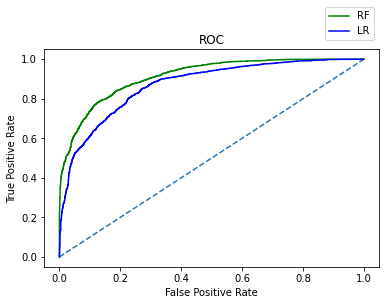

In [74]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lr_train_fpr,lr_train_tpr,color='blue',label="LR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for all the models on the Test data

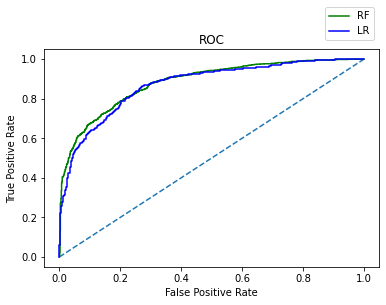

In [75]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lr_test_fpr,lr_test_tpr,color='blue',label="LR")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [83]:
submission = pd.DataFrame([df1['PassengerId'], Ytest_predict]).T
submission.columns = ['PassengerID', 'Transported']

In [84]:
submission.head()

,PassengerID,Transported
0,0013_01,0
1,0018_01,1
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [90]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerID  4277 non-null   object
 1   Transported  1982 non-null   object
dtypes: object(2)
memory usage: 67.0+ KB


In [87]:
submission.to_csv('spaceship_submission.csv', index=False)

In [88]:
!kaggle competitions submit -c spaceship-titanic -m "initial gb model" -f "kaggle_submission.csv"

Traceback (most recent call last):
  File "c:\users\lenovo x1\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\lenovo x1\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Lenovo X1\anaconda3\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "c:\users\lenovo x1\anaconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "c:\users\lenovo x1\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\Lenovo X1\.kaggle. Or use the environment method.


# <font color='purple'> END